# **3. PyTorch Computer Vision**



![example computer vision problems](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-problems.png)
*Example computer vision problems for binary classification, multiclass classification, object detection and segmentation.*

## Where does computer vision get used?

If you use a smartphone, you've already used computer vision.

Camera and photo apps use [computer vision to enhance](https://machinelearning.apple.com/research/panoptic-segmentation) and sort images.

Modern cars use [computer vision](https://youtu.be/j0z4FweCy4M?t=2989) to avoid other cars and stay within lane lines.

Manufacturers use computer vision to identify defects in various products.

Security cameras use computer vision to detect potential intruders.

In essence, anything that can described in a visual sense can be a potential computer vision problem.

## What we're going to cover

We're going to apply the PyTorch Workflow we've been learning in the past couple of sections to computer vision.

![a PyTorch workflow with a computer vision focus](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-pytorch-computer-vision-workflow.png)

Specifically, we're going to cover:

| **Topic** | **Contents** |
| ----- | ----- |
| **0. Computer vision libraries in PyTorch** | PyTorch has a bunch of built-in helpful computer vision libraries, let's check them out.  |
| **1. Load data** | To practice computer vision, we'll start with some images of different pieces of clothing from [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). |
| **2. Prepare data** | We've got some images, let's load them in with a [PyTorch `DataLoader`](https://pytorch.org/docs/stable/data.html) so we can use them with our training loop. |
| **3. Model 0: Building a baseline model** | Here we'll create a multi-class classification model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop**. |
| **4. Making predictions and evaluting model 0** | Let's make some predictions with our baseline model and evaluate them. |
| **5. Setup device agnostic code for future models** | It's best practice to write device-agnostic code, so let's set it up. |
| **6. Model 1: Adding non-linearity** | Experimenting is a large part of machine learning, let's try and improve upon our baseline model by adding non-linear layers. |
| **7. Model 2: Convolutional Neural Network (CNN)** | Time to get computer vision specific and introduce the powerful convolutional neural network architecture. |
| **8. Comparing our models** | We've built three different models, let's compare them. |
| **9. Evaluating our best model** | Let's make some predictons on random images and evaluate our best model. |
| **10. Making a confusion matrix** | A confusion matrix is a great way to evaluate a classification model, let's see how we can make one. |
| **11. Saving and loading the best performing model** | Since we might want to use our model for later, let's save it and make sure it loads back in correctly. |

## 0. Computer vision libraries in PyTorch

Before we get started writing code, let's talk about some PyTorch computer vision libraries you should be aware of.

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. |
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. |
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  |
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

> **Note:** The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.

Now we've covered some of the most important PyTorch computer vision libraries, let's import the relevant dependencies.


![Computer Vision Input and Output Shapes](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-input-and-output-shapes.png)
)


## **What is a (CNN) ?**

| Term | Description |
|------|-------------|
| CNN  | **Convolutional Neural Network (CNN)**. A type of deep learning model particularly suited for image data. CNNs are composed of multiple layers that automatically and adaptively learn spatial hierarchies of features from low-level edges to high-level details. They are primarily used in tasks like image classification, object detection, and facial recognition. CNN architecture typically includes: <br><br> - **Convolutional Layers**: Apply filters to detect features such as edges, textures, and patterns by convolving (sliding) across the input image.<br> - **Pooling Layers**: Reduce the spatial dimensions of the feature maps to lower computation, often using max pooling to retain the most prominent features.<br> - **Fully Connected Layers**: Connect neurons from one layer to another in a dense fashion, helping classify the features learned in previous layers.<br> - **Activation Functions**: Introduce non-linearities (e.g., ReLU) to enable complex mappings between inputs and outputs.<br><br> CNNs are distinguished from other neural networks by their use of convolutional layers, which allow them to retain spatial information and recognize patterns regardless of position within an image. |


---


| Layer Type                     | Purpose & Function                                                                                                                                                                                                                   |
|--------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Input Layer**                | Receives the raw pixel values of the input image, typically in 3D format (width, height, channels like RGB).                                                                                                                        |
| **Convolutional Layer**        | Applies multiple filters (kernels) to detect local patterns such as edges, textures, and shapes. Each filter creates a feature map that enhances important features and reduces irrelevant data.                                    |
| **Non-linear Activation Layer** (e.g., **ReLU**) | Introduces non-linearity to the network, enabling it to learn complex relationships. ReLU (Rectified Linear Unit) is the most common choice, transforming negative values to zero, which helps to avoid the vanishing gradient problem.                |
| **Hidden Convolutional Layers** | Deeper layers that apply additional convolutions, learning more abstract features as depth increases. Each hidden layer learns increasingly complex representations, from simple edges to high-level shapes and textures.       |
| **Pooling Layer** (e.g., **Max Pooling**) | Reduces the spatial dimensions (width, height) of feature maps, lowering computational requirements and highlighting dominant features. Max pooling, often with a 2x2 filter, captures the strongest feature in each region. |
| **Fully Connected (Dense) Layer** | Combines all neurons from previous layers, enabling the network to learn global patterns across the whole image. These dense layers are typically used near the end of the network to perform final classification or regression. |
| **Additional Non-linear Activation** (e.g., **ReLU or Sigmoid**) | Often placed after dense layers to add non-linearity. ReLU is common, but sigmoid or tanh may be used in specific cases, such as binary classification tasks.                                        |
| **Output Layer**               | Produces the final predictions. In classification tasks, this layer typically uses softmax for multi-class classification or sigmoid for binary classification, converting network outputs into probabilities.                          |


In [187]:
# import pytorch
import torch
from torch import nn

#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor # for transformation and augementation


# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")


PyTorch version: 2.5.0+cu121
torchvision version: 0.20.0+cu121


The `ToTensor` transform from `torchvision.transforms` is used to convert image data into a format suitable for PyTorch models. Here’s what `ToTensor` does:

1. **Convert Image to Tensor**: `ToTensor` converts a PIL Image or a NumPy `ndarray` (like an image in pixel format) into a PyTorch tensor. PyTorch models expect inputs to be in tensor format, not in the standard image or array formats.

2. **Normalize Pixel Values**: `ToTensor` scales pixel values from the usual 0–255 range (typical for images) down to a range of 0–1 by dividing each pixel value by 255. This normalization helps with faster training and improves gradient stability during deep learning.

### Example Usage

In a typical data preprocessing pipeline, `ToTensor` is often combined with other transforms.


[FashionMNIST](https://github.com/zalandoresearch/fashion-mnist), made by Zalando Research, is a similar setup.

Except it contains grayscale images of 10 different kinds of clothing.

![example image of FashionMNIST](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-fashion-mnist-slide.png)
*`torchvision.datasets` contains a lot of example datasets you can use to practice writing computer vision code on. FashionMNIST is one of those datasets. And since it has 10 different image classes (different types of clothing), it's a multi-class classification problem.*

PyTorch has a bunch of common computer vision datasets stored in `torchvision.datasets`.

Including FashionMNIST in [`torchvision.datasets.FashionMNIST()`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html).

To download it, we provide the following parameters:
* `root: str` - which folder do you want to download the data to?
* `train: Bool` - do you want the training or test split?
* `download: Bool` - should the data be downloaded?
* `transform: torchvision.transforms` - what transformations would you like to do on the data?
* `target_transform` - you can transform the targets (labels) if you like too.

Many other datasets in `torchvision` have these parameter options.

In [188]:
train_data = torchvision.datasets.FashionMNIST(
    root="data", # dowload location
    train=True,
    download=True,
    transform=ToTensor(),  # images come as PIL format, we want to turn into Torch tensors
    target_transform=None
)
test_data= torchvision.datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [189]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

### **1.1 input and output shapes of a computer vision model**

In [190]:
image.shape

torch.Size([1, 28, 28])

`[color_channels=1, height=28, width=28]`
> having color_channels=1 means that the image is grayscale

![example input and output shapes of the fashionMNIST problem](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-input-and-output-shapes.png)

> **Note:** You'll also see `NCHW` and `NHWC` formats where `N` stands for *number of images*. For example if you have a `batch_size=32`, your tensor shape may be `[32, 1, 28, 28]`. We'll cover batch sizes later.

PyTorch generally accepts `NCHW` (channels first) as the default for many operators.

In [191]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

via `.classes` attribute we get no of classes

In [192]:
classes_names= train_data.classes
classes_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

we have 10 classes so we will work with `multi-class classification`

### **1.2 visiual our data**

In [193]:
image.ndim

3

Image shape: torch.Size([1, 28, 28])


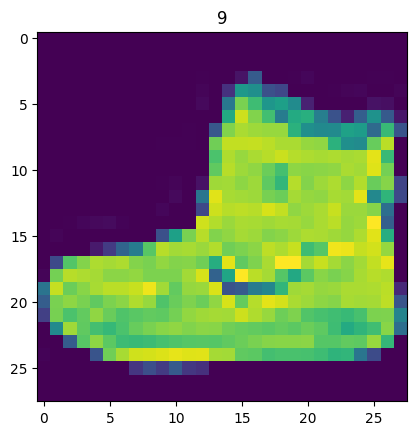

In [194]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);

we can turn the image into grayscal using `cmap` parameter of `plt.imshow()`

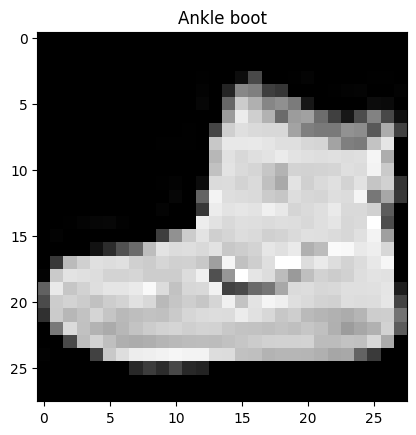

In [195]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(classes_names[label]);


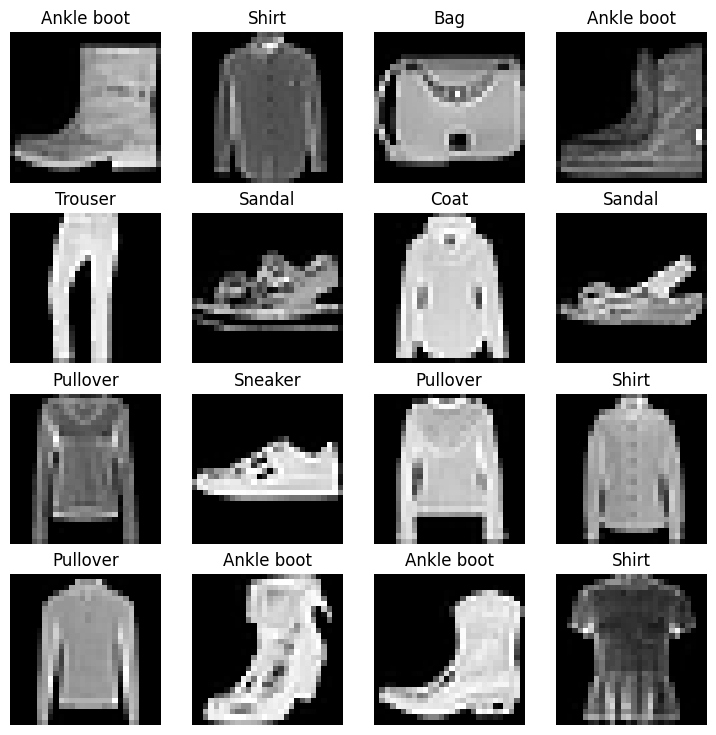

In [196]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols +1):
  ranadom_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label =  train_data[ranadom_idx]
  fig.add_subplot(rows, cols, i) # contain rows*cols
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(classes_names[label])
  plt.axis(False);


> **Question:** Do you think the above data can be model with only straight (linear) lines? Or do you think you'd also need non-straight (non-linear) lines?

## **2. Prepare DataLoader**

To prepare data, use a [torch.utils.data.DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset), or simply `DataLoader`. This tool loads data efficiently by breaking a large `Dataset` into smaller, manageable chunks called **batches** (or **mini-batches**), controlled by the `batch_size` parameter. Batching allows the model to process data in parts, making computation easier and faster, especially with large datasets, and enables more frequent gradient updates per epoch.

A good starting batch size is often [32](https://twitter.com/ylecun/status/989610208497360896?s=20&t=N96J_jotN--PYuJk2WcjMw), though it varies by problem. Common values are powers of 2 (e.g., 32, 64, 128, 256, 512).

![An example of what a batched dataset looks like](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-batching-fashionmnist.png)
*Batching FashionMNIST with a batch size of 32 and shuffle turned on. A similar batching process will occur for other datasets but will differ depending on the batch size.*

Now, let's create `DataLoader`s for our training and test sets.


In [197]:
from torch.utils.data import DataLoader
# setup batch size as hyperparameter
BATCH_SIZE = 32
# turn your data to be iterable as dataframe in pandas
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle= True)
test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle= False)
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")


Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7eae8a8f0760>, <torch.utils.data.dataloader.DataLoader object at 0x7eae8772c8b0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [198]:
train_features_batch, train_label_batch = next(iter(train_dataloader))
print(train_features_batch.shape, train_label_batch.shape)
print(train_features_batch.ndim, train_label_batch.ndim)

torch.Size([32, 1, 28, 28]) torch.Size([32])
4 1


Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


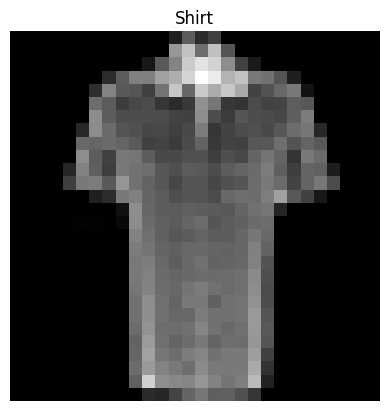

In [199]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(classes_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## **3. Model_0: building a baseline model**


Data loaded and prepared!

Time to build a **baseline model** by subclassing `nn.Module`.

A **baseline model** is one of the simplest models you can imagine.

You use the baseline as a starting point and try to improve upon it with subsequent, more complicated models.

Our baseline will consist of two [`nn.Linear()`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layers.

We've done this in a previous section but there's going to one slight difference.

Because we're working with image data, we're going to use a different layer to start things off.

And that's the [`nn.Flatten()`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) layer.

`nn.Flatten()` compresses the dimensions of a tensor into a single vector.

This is easier to understand when you see it.

`nn.Flatten` is a layer in PyTorch's `torch.nn` module that reshapes the input tensor by flattening all dimensions except the batch dimension. This is often used to prepare data from convolutional layers for fully connected layers in a neural network.

> Purpose of `nn.Flatten`
In Convolutional Neural Networks (CNNs), convolutional and pooling layers produce multi-dimensional outputs (e.g., `[batch_size, channels, height, width]`). However, fully connected layers (dense layers) expect inputs to be in a 1D format, such as `[batch_size, features]`. `nn.Flatten` simplifies this by reshaping the output of the previous layers into a flat vector.


In [200]:
# create a flatten layer
flatten_model = nn.Flatten()

X= train_features_batch[0]
output = flatten_model(X)

print(f"Shape before flattening: {X.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")


Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


> Why do this?

Because we've now turned our pixel data from height and width dimensions into one long **feature vector**.

In [201]:
from torch import nn
class FashionMNISTMODELV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape : int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)

We've got a baseline model class we can use, now let's instantiate a model.

We'll need to set the following parameters:
* `input_shape=784` - this is how many features you've got going in the model, in our case, it's one for every pixel in the target image (28 pixels high by 28 pixels wide = 784 features).
* `hidden_units=10` - number of units/neurons in the hidden layer(s), this number could be whatever you want but to keep the model small we'll start with `10`.
* `output_shape=len(class_names)` - since we're working with a multi-class classification problem, we need an output neuron per class in our dataset.

Let's create an instance of our model and send to the CPU for now (we'll run a small test for running `model_0` on CPU vs. a similar model on GPU soon).

In [202]:
torch.manual_seed(42)

model_0 = FashionMNISTMODELV0(input_shape=784,
                              hidden_units=10,
                              output_shape=len(classes_names))
model_0.to("cpu")

FashionMNISTMODELV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

#### **3.1 setup loss, optimizer and evaluation metrics**
> **Note:** Rather than importing and using our own accuracy function or evaluation metric(s), you could import various evaluation metrics from the [TorchMetrics package](https://torchmetrics.readthedocs.io/en/latest/).


[`helper_functions.py` script](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py)

In [203]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("Downloaded, skipping download")
else:
  print("Downloading...")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


Downloaded, skipping download


In [204]:
print("it has been downloaded why still waiting it hhhhhh i joke with you when be printed ...")

it has been downloaded why still waiting it hhhhhh i joke with you when be printed ...


In [205]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

#### **3.2 for fun**


In [206]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

#### **3.3 train and test loop**


Our data batches are contained within our `DataLoader`s, `train_dataloader` and `test_dataloader` for the training and test data splits respectively.

A batch is `BATCH_SIZE` samples of `X` (features) and `y` (labels), since we're using `BATCH_SIZE=32`, our batches have 32 samples of images and targets.

And since we're computing on batches of data, our loss and evaluation metrics will be calculated **per batch** rather than across the whole dataset.

This means we'll have to divide our loss and accuracy values by the number of batches in each dataset's respective dataloader.

Let's step through it:
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all (for fun).

In [207]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()
epochs  = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_loss = 0
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    y_pred= model_0(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
  train_loss /= len(train_dataloader)


  ## testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      test_pred = model_0(X)

      test_loss += loss_fn(test_pred, y)

      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start= train_time_start_on_cpu, end= train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 47.667 seconds


### **4. Make predictions and get result model_0**

Since we're going to be building a few models, it's a good idea to write some code to evaluate them all in similar ways.

Namely, let's create a function that takes in a trained model, a `DataLoader`, a loss function and an accuracy function.

The function will use the model to make predictions on the data in the `DataLoader` and then we can evaluate those predictions using the loss function and accuracy function.

In [208]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.dataloader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
  """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                          y_pred=y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)
    """
 if you want a method inside a class to return a single scalar value instead of a tensor,
 you can use .item() to convert a one-element tensor to a Python number.
    """
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}
model_0_results= eval_model(model=model_0, data_loader=test_dataloader,
                            loss_fn = loss_fn, accuracy_fn=accuracy_fn)
model_0_results


{'model_name': 'FashionMNISTMODELV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

### **setup device agnostic-code**

> **Note:** Model training time is dependent on hardware used. Generally, more processors means faster training and smaller models on smaller datasets will often train faster than large models and large datasets.

Now let's setup some [device-agnostic code](https://pytorch.org/docs/stable/notes/cuda.html#best-practices) for our models and data to run on GPU if it's available.

If you're running this notebook on Google Colab, and you don't a GPU turned on yet, it's now time to turn one on via `Runtime -> Change runtime type -> Hardware accelerator -> GPU`. If you do this, your runtime will likely reset and you'll have to run all of the cells above by going `Runtime -> Run before`.

In [209]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'


### **6. Model_1 enhanced model**

We learned about [the power of non-linearity in notebook 02](https://www.learnpytorch.io/02_pytorch_classification/#6-the-missing-piece-non-linearity).

Seeing the data we've been working with, do you think it needs non-linear functions?

And remember, linear means straight and non-linear means non-straight.

Let's find out.

We'll do so by recreating a similar model to before, except this time we'll put non-linear functions (`nn.ReLU()`) in between each linear layer.


In [210]:

class FashionMNISTMODELV1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )
  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)

In [211]:
torch.manual_seed(42)
model_1 = FashionMNISTMODELV1(input_shape= 784,
                              hidden_units=10,
                              output_shape=len(classes_names)
                              ).to(device)
next(model_1.parameters()).device


device(type='cpu')

In [212]:
"""
 using next() with model_1.parameters() to access the first parameter is a quick way to
 check the model's device without examining each parameter individually.
"""

"\n using next() with model_1.parameters() to access the first parameter is a quick way to \n check the model's device without examining each parameter individually.\n"

#### **6.1 setup loss, optimizer and evalution metices**


In [213]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)


#### **6.2 Functionizing training and test loops**

Let's write them again but this time we'll put them in functions so they can be called again and again.

And because we're using device-agnostic code now, we'll be sure to call `.to(device)` on our feature (`X`) and target (`y`) tensors.

For the training loop we'll create a function called `train_step()` which takes in a model, a `DataLoader` a loss function and an optimizer.

The testing loop will be similar but it'll be called `test_step()` and it'll take in a model, a `DataLoader`, a loss function and an evaluation function.

> **Note:** Since these are functions, you can customize them in any way you like. What we're making here can be considered barebones training and testing functions for our specific classification use case.

In [214]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):
  train_loss,train_acc= 0,0
  for batch, (X,y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    #1- forawar pass
    y_pred = model(X)
    #2- calculate loss
    loss = loss_fn(y_pred, y)
    train_loss+=loss
    train_acc+=accuracy_fn(y_true=y,
                           y_pred=y_pred.argmax(dim=1))
    #3- optimizer zero grad
    optimizer.zero_grad()

    #4- loss backward
    loss.backward()

    # optimizer step
    optimizer.step()

  # calculate loss and acc
  train_loss/= len(data_loader)
  train_acc/= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")



def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device=device):
  test_loss, test_acc = 0, 0
  model.eval() # pur model in eval mode
  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device), y.to(device)
      test_pred = model(X)
      test_loss+= loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)
                              )
        # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")



> **Note:** You can customize how often you do a testing step. Sometimes people do them every five epochs or 10 epochs or in our case, every epoch.

Let's also time things to see how long our code takes to run on the GPU.

In [215]:
torch.manual_seed(42)
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n----------------")
  train_step(data_loader= train_dataloader,
             model=model_1,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn= accuracy_fn)
  test_step(data_loader=test_dataloader,
            model=model_1,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)

train_time_end_on_gpu = timer()
total_train_time_model_1= print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
----------------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1 
----------------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2 
----------------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cpu: 41.483 seconds


> **Question:** "I used a a GPU but my model didn't train faster, why might that be?"
>
> **Answer:** Well, one reason could be because your dataset and model are both so small (like the dataset and model we're working with) the benefits of using a GPU are outweighed by the time it actually takes to transfer the data there.
>
> There's a small bottleneck between copying data from the CPU memory (default) to the GPU memory.
>
> So for smaller models and datasets, the CPU might actually be the optimal place to compute on.
>
> But for larger datasets and models, the speed of computing the GPU can offer usually far outweighs the cost of getting the data there.
>
> However, this is largely dependant on the hardware you're using. With practice, you will get used to where the best place to train your models is.

Let's evaluate our trained `model_1` using our `eval_model()` function and see how it went.

In [216]:
torch.manual_seed(42)
# note this will error "eval_model()" not using device agnostic
model_1_result= eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model_1_result

{'model_name': 'FashionMNISTMODELV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

> `RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)`

It's because we've setup our data and model to use device-agnostic code but not our evaluation function.

How about we fix that by passing a target `device` parameter to our `eval_model()` function?

Then we'll try calculating the results again.

In [217]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device=device):
  """Evaluates a given model on a given dataset.

  Args:
      model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
      data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
      loss_fn (torch.nn.Module): The loss function of model.
      accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
      device (str, optional): Target device to compute on. Defaults to device.

  Returns:
      (dict): Results of model making predictions on data_loader.
  """
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device), y.to(device)
      y_pred = model(X)
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
                             loss_fn=loss_fn, accuracy_fn=accuracy_fn,
                             device=device
)
model_1_results


{'model_name': 'FashionMNISTMODELV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [218]:
model_0_results

{'model_name': 'FashionMNISTMODELV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

From the looks of things, it seems like our model is **overfitting** on the training data.

Overfitting means our model is learning the training data well but those patterns aren't generalizing to the testing data.

Two of the main to fix overfitting include:
1. Using a smaller or different model (some models fit certain kinds of data better than others).
2. Using a larger dataset (the more data, the more chance a model has to learn generalizable patterns).

### **7. Model_2 building CNN**


It's time to create a [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN or ConvNet).

CNN's are known for their capabilities to find patterns in visual data.

And since we're dealing with visual data, let's see if using a CNN model can improve upon our baseline.

The CNN model we're going to be using is known as TinyVGG from the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website.

It follows the typical structure of a convolutional neural network:

`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

Where the contents of `[Convolutional layer -> activation layer -> pooling layer]` can be upscaled and repeated multiple times, depending on requirements.

> What model should I use?

> **Question:** Wait, you say CNN's are good for images, are there any other model types I should be aware of?

Good question.

This table is a good general guide for which model to use (though there are exceptions).

| **Problem type** | **Model to use (generally)** | **Code example** |
| ----- | ----- | ----- |
| Structured data (Excel spreadsheets, row and column data) | Gradient boosted models, Random Forests, XGBoost | [`sklearn.ensemble`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble), [XGBoost library](https://xgboost.readthedocs.io/en/stable/) |
| Unstructured data (images, audio, language) | Convolutional Neural Networks, Transformers | [`torchvision.models`](https://pytorch.org/vision/stable/models.html), [HuggingFace Transformers](https://huggingface.co/docs/transformers/index) |

> **Note:** The table above is only for reference, the model you end up using will be highly dependant on the problem you're working on and the constraints you have (amount of data, latency requirements).

Enough talking about models, let's now build a CNN that replicates the model on the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

![TinyVGG architecture, as setup by CNN explainer website](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-cnn-explainer-model.png)

To do so, we'll leverage the [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) and [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) layers from `torch.nn`.


In [219]:
class FashionMNISTMODELV2(nn.Module):
  """
  Model architecture copying TinyVGG from:
  https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block_1= nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.block_2=nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self, x:torch.Tensor):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.classifier(x)
    return x
torch.manual_seed(42)
model_2 = FashionMNISTMODELV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(classes_names)).to(device)
model_2

FashionMNISTMODELV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

#### **7.1 stepping through `nn.Conv2d()`**

let's first step through the two new layers we've added:
* [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html), also known as a convolutional layer.
* [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html), also known as a max pooling layer.

> **Question:** What does the "2d" in `nn.Conv2d()` stand for?
>
> The 2d is for 2-dimensional data. As in, our images have two dimensions: height and width. Yes, there's color channel dimension but each of the color channel dimensions have two dimensions too: height and width.
>
> For other dimensional data (such as 1D for text or 3D for 3D objects) there's also `nn.Conv1d()` and `nn.Conv3d()`.

# Convolutional Neural Networks (CNNs) in Computer Vision

### CNN Architecture Overview

| **Layer**                     | **Function**                                                                                                 | **Purpose**                                                                                            |
|-------------------------------|-------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------|
| **Convolutional Layer**       | Applies filters to detect edges, shapes, or textures by convolving across the input image.                  | Extracts spatial features relevant for classification.                                                 |
| **Activation (ReLU)**         | Introduces non-linearity by setting negative values in the feature map to zero.                             | Helps model complex patterns and prevents issues like vanishing gradients.                              |
| **Pooling Layer**             | Downsamples the feature map, typically by keeping only the maximum value in each region (Max Pooling).      | Reduces the spatial size, maintaining essential features while reducing noise.                         |
| **Fully Connected Layer**     | Flattens the feature maps and connects them to a dense layer for final classification.                      | Integrates extracted features to make a final decision.                                                |
| **Softmax Layer**             | Converts the final output into probabilities for each class.                                                | Provides the final class prediction with confidence scores.                                            |

---

### Step-by-Step Process of CNN

#### 1. **Input Image**
The input image is fed into the CNN, usually resized to a standard dimension like \( 28 \times 28 \) or \( 224 \times 224 \) pixels for consistency across samples.

#### 2. **Convolutional Layer**
   - **Process**: The layer slides small filters (kernels) over the input image, performing an element-wise multiplication and summing results to create a feature map.
   - **Result**: A feature map that highlights specific features, such as edges or textures.
```plaintext
   | **Example**                |                                         |
   |----------------------------|-----------------------------------------|
   | **Input Image (5x5)**      | `[[1, 2, 0, 1, 0], [3, 1, 0, 2, 3], ...]` |
   | **3x3 Filter (Kernel)**    | `[[1, 0, -1], [1, 0, -1], [1, 0, -1]]` |
   | **Feature Map (3x3)**      | `[[4, -1, 3], [0, 1, 2], ...]`            |
```

#### 3. **Activation Layer (ReLU)**
   - **Process**: Applies the Rectified Linear Unit (ReLU) function to each element of the feature map, setting all negative values to zero.
   - **Result**: An activated feature map with only positive values, allowing for complex pattern recognition.
```plaintext

   | **Feature Map Before ReLU**    | **Feature Map After ReLU**   |
   |--------------------------------|------------------------------|
   | `[[4, -1, 3], [0, 1, 2], ...]` | `[[4, 0, 3], [0, 1, 2], ...]`|
```
#### 4. **Pooling Layer**
   - **Process**: Reduces the spatial size of the feature map by keeping only the maximum value in each window (e.g., 2x2).
   - **Result**: A smaller, downsampled feature map that retains the most important features.
```plaintext

   | **Feature Map Before Pooling** | **Pooled Map (2x2)**            |
   |--------------------------------|----------------------------------|
   | `[[4, 0, 3], [0, 1, 2], ...]`  | `[[4, 3], [1, 2], ...]`         |
```
#### 5. **Flattening and Fully Connected Layer**
   - **Flattening**: Converts the pooled feature maps into a 1D vector.
   - **Fully Connected Layer**: This vector is passed through a dense network layer, which combines the learned features to make a final decision.
```plaintext

   | **Flattened Vector**           | **Fully Connected Layer Output** |
   |--------------------------------|----------------------------------|
   | `[4, 3, 1, 2, ...]`            | `[class_scores]`                |
```
#### 6. **Output Layer (Softmax)**
   - **Process**: Converts the fully connected layer’s output into a probability distribution over the classes.
   - **Result**: Probabilities indicating the confidence for each class.
```plaintext

   | **Class Scores**             | **Softmax Probabilities**        |
   |------------------------------|----------------------------------|
   | `[score1, score2, ...]`      | `[p(class1), p(class2), ...]`   |
```
---

### Summary Visualization
```plaintext

| **Layer Type**            | **Description**                                          |
|---------------------------|----------------------------------------------------------|
| **Input Image**           | Resized and standardized for CNN processing.             |
| **Convolutional Layer**   | Applies filters to detect basic features.                |
| **ReLU Activation**       | Adds non-linearity by setting negative values to zero.   |
| **Pooling Layer**         | Downsamples feature maps, preserving key details.        |
| **Fully Connected Layer** | Combines features for classification.                    |
| **Softmax Output**        | Produces final probabilities for each class.             |
```


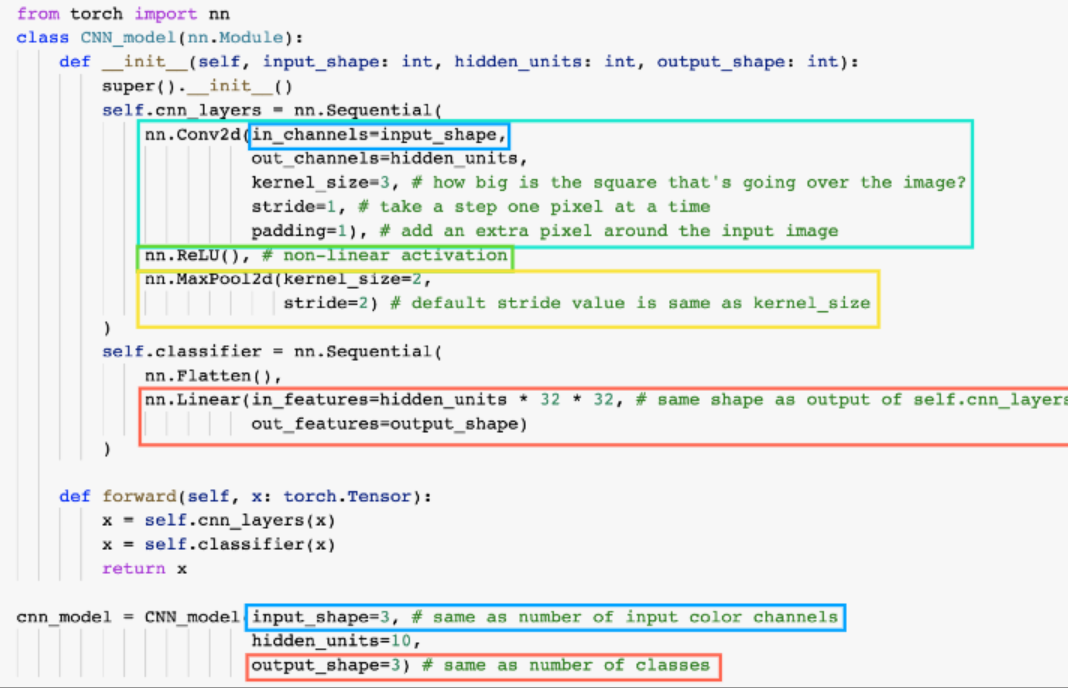

In [220]:
torch.manual_seed(42)
images = torch.randn(size=(32,3,64,64))
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

Let's create an example `nn.Conv2d()` with various parameters:
* `in_channels` (int) - Number of channels in the input image.
* `out_channels` (int) - Number of channels produced by the convolution.
* `kernel_size` (int or tuple) - Size of the convolving kernel/filter.
* `stride` (int or tuple, optional) - How big of a step the convolving kernel takes at a time. Default: 1.
* `padding` (int, tuple, str) - Padding added to all four sides of input. Default: 0.

![example of going through the different parameters of a Conv2d layer](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv2d-layer.gif)

*Example of what happens when you change the hyperparameters of a `nn.Conv2d()` layer.*

In [221]:
torch.manual_seed(42)

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

conv_layer(test_image).shape

torch.Size([10, 62, 62])

In [222]:
test_image.shape

torch.Size([3, 64, 64])

In [223]:
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [224]:
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

##### **PyTorch `nn.Conv2d` Layer Explanation**

The `nn.Conv2d` layer in PyTorch is used to apply a 2D convolution to an input image or feature map, making it a foundational operation in Convolutional Neural Networks (CNNs). Here’s a deeper look into each parameter and how it influences the convolution operation.

> Parameters

`1. `in_channels` (int)`

- **Description**: Specifies the number of input channels in the image or feature map.
   - For example:
      - Grayscale image: `in_channels=1`
      - RGB image: `in_channels=3`
- **Role**: Tells the layer how many filters to apply per input channel. Input shape is usually `[batch_size, in_channels, height, width]`.

`2. `out_channels` (int)`

- **Description**: Defines the number of filters (or kernels) applied in the convolution. Each filter will produce an output channel.
   - Example: `out_channels=64` results in an output with 64 channels.
- **Role**: Increasing `out_channels` allows the model to learn more complex features, as each filter can capture different aspects of the input.

`3. `kernel_size` (int or tuple)`

- **Description**: Specifies the size of the convolving kernel.
   - Integer (e.g., `kernel_size=3`): Uses a square kernel, e.g., `3x3`.
   - Tuple (e.g., `kernel_size=(3, 5)`): Uses different kernel sizes for height and width, e.g., `3x5`.
- **Role**: Larger kernels capture more context but increase computational cost and may reduce spatial resolution.

`4. `stride` (int or tuple, optional; default: 1)`

- **Description**: Defines the step size of the kernel across the input.
   - Stride of `1`: Moves the kernel one pixel at a time.
   - Stride greater than `1` (e.g., `stride=2`): Skips positions, downsampling the output feature map.
- **Role**: Higher strides reduce the spatial dimensions of the output, providing downsampling without pooling layers.

`5. `padding` (int, tuple, str; default: 0)`

- **Description**: Adds extra rows and columns around the input to control output dimensions.
   - Integer (e.g., `padding=1`): Adds the same padding around all sides.
   - Tuple (e.g., `padding=(1, 2)`): Specifies different padding for height and width.
   - Padding modes like `'same'` and `'valid'` can be used to control output size.
- **Role**: Padding preserves spatial dimensions when desired, preventing excessive shrinking across layers.

In [225]:
torch.manual_seed(42)
conv_layer_2 = nn.Conv2d(in_channels=3,
                        out_channels= 10,
                        kernel_size=(5,5),
                        stride=2,
                        padding=0)
print(test_image.shape)
print(test_image.unsqueeze(dim=0).shape)

print(conv_layer_2(test_image).shape)
print(conv_layer_2(test_image.unsqueeze(dim=0)).shape)

torch.Size([3, 64, 64])
torch.Size([1, 3, 64, 64])
torch.Size([10, 30, 30])
torch.Size([1, 10, 30, 30])


# Output Shape Calculations

The formula for calculating the output size for a convolution operation is:

[
{Output Size} = {{Input Size} - {Kernel Size} + 2 * {Padding}}  / {{Stride}} + 1
]

## Width and Height Calculation

For an input size of 64, a kernel size of 5, no padding, and a stride of 2:

[
{Output Size} = {64 - 5 + 2 * 0}/{2} + 1 = {59}/{2} + 1 = 29.5 + 1 = 30
]

Thus, the output spatial dimensions will be 30x30.



Now our image is of shape `[1, 10, 30, 30]` (it will be different if you use different values) or `[batch_size=1, color_channels=10, height=30, width=30]`.

What's going on here?

Behind the scenes, our `nn.Conv2d()` is compressing the information stored in the image.

It does this by performing operations on the input (our test image) against its internal parameters.

The goal of this is similar to all of the other neural networks we've been building.

Data goes in and the layers try to update their internal parameters (patterns) to lower the loss function thanks to some help of the optimizer.

The only difference is *how* the different layers calculate their parameter updates or in PyTorch terms, the operation present in the layer `forward()` method.

If we check out our `conv_layer_2.state_dict()` we'll find a similar weight and bias setup as we've seen before.

In [226]:
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

In [227]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


#### **7.2 Stepping `nn.MaxPool2d()`**


In [228]:
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

max_pool_layer = nn.MaxPool2d(kernel_size=2)

test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [229]:
torch.manual_seed(42)
random_tensor = torch.randn(size=(1,1,2,2))
print(random_tensor)
print(random_tensor.ndim)

max_pool_layer = nn.MaxPool2d(kernel_size=2)
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
4

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


# Dimensionality Reduction with `nn.MaxPool2d`

Notice how `random_tensor`'s final dimensions shrink from `[2, 2]` to `[1, 1]` in `max_pool_tensor`. This reduction happens through max pooling, which retains only the maximum value, effectively compressing the data. Different `kernel_size` values in `nn.MaxPool2d()` will produce varied results.

## Compression in Neural Networks

Each neural network layer compresses data, reducing high-dimensional information into smaller, predictive patterns. This "compression" allows neural networks to learn essential features while minimizing complexity.

For example, `nn.MaxPool2d()` reduces dimensionality by selecting maximum values, while `nn.Conv2d()` applies filters to learn patterns.

![Neural Network Compression](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv-net-as-compression.png)

In essence, neural networks aim to compress information for intelligence.

> **Exercise:** Try `nn.AvgPool2d()` on a random tensor, and observe input and output shapes as well as averaged values.

> **Further Exploration:** Research popular CNN architectures and explore the [`torchvision.models`](https://pytorch.org/vision/stable/models.html) library to see how these models might fit your projects.


# Comparison of Popular CNN Architectures

| **Architecture** | **Year** | **Key Features**                                                                                                                                     | **Advantages**                                                                                                                   | **Limitations**                                                                                             | **Common Applications**                         |
|------------------|----------|------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------|------------------------------------------------|
| **VGG**         | 2014     | Sequential layers with increasing depth (16 or 19 layers), using only 3x3 convolutions and 2x2 max pooling layers.                                   | Simple design, easy to implement, very effective in feature extraction.                                                           | High computational cost, large model size due to deep structure.                                                 | Image classification, feature extraction.      |
| **ResNet**      | 2015     | Introduced "Residual Blocks" with skip connections that allow gradients to flow directly across layers.                                              | Enables very deep networks (up to 152 layers) without vanishing gradient problems.                                                | Complex design, higher memory usage due to skip connections.                                                    | Image classification, object detection.        |
| **Inception**   | 2014     | Uses "Inception modules" that combine multiple convolutional layers (1x1, 3x3, 5x5) to capture multi-scale features within each layer.              | Efficient multi-scale feature extraction, reduces computational cost through dimensionality reduction.                             | Complex architecture, difficult to optimize.                                                                    | Object detection, face recognition.            |
| **MobileNet**   | 2017     | Lightweight architecture using "Depthwise Separable Convolutions" to reduce the number of parameters and computational cost.                         | High efficiency, suitable for mobile and embedded devices.                                                                        | Lower accuracy compared to larger models.                                                                       | Mobile image processing, real-time applications.|
| **DenseNet**    | 2017     | Each layer receives inputs from all previous layers via "Dense Connections," promoting feature reuse and efficient gradient flow.                    | Reduced number of parameters, efficient feature reuse, alleviates vanishing gradients.                                             | High memory usage due to many connections.                                                                      | Image segmentation, medical imaging.           |
| **Xception**    | 2017     | Extension of Inception, using "Depthwise Separable Convolutions" across channels, resulting in efficient model performance.                          | High accuracy, efficient computational performance, suitable for a variety of tasks.                                              | Not as commonly used as ResNet or VGG, may not be suitable for all applications.                               | Image classification, object detection.        |
| **EfficientNet**| 2019     | Balances depth, width, and resolution of layers based on a scaling formula, resulting in highly efficient models with fewer parameters.              | State-of-the-art performance with fewer parameters, scales well across different tasks.                                           | Complex scaling process, requires extensive fine-tuning.                                                        | Image classification, transfer learning tasks. |

---

### Key Architecture Components Comparison

| **Component**         | **VGG**                   | **ResNet**                  | **Inception**                | **MobileNet**               | **DenseNet**                | **Xception**                 | **EfficientNet**             |
|-----------------------|---------------------------|-----------------------------|------------------------------|-----------------------------|-----------------------------|------------------------------|------------------------------|
| **Convolution Type**  | 3x3 Convolutions          | Standard Convolutions       | Mixed (1x1, 3x3, 5x5)        | Depthwise Separable         | Standard Convolutions       | Depthwise Separable          | Standard Convolutions        |
| **Key Innovation**    | Simple stacking           | Residual connections        | Multi-scale Inception blocks | Depthwise Convolutions      | Dense Connections           | Extreme Inception (Xception) | Compound scaling             |
| **Layers/Depth**      | Deep (16-19 layers)       | Very Deep (up to 152 layers)| Varies based on inception    | Shallow to Medium           | Medium to Deep              | Medium to Deep               | Shallow to Deep              |
| **Model Size**        | Large                     | Medium to Large             | Medium                       | Small                       | Medium                      | Medium                       | Variable (based on scaling)  |
| **Parameter Efficiency** | Low                    | Moderate                    | Moderate                     | High                        | Moderate                    | High                         | Very High                    |
| **Speed**             | Moderate                  | Moderate                    | Moderate                     | High                        | Moderate                    | Moderate                     | High                         |

---

### Performance Comparison on ImageNet

| **Architecture**   | **Top-1 Accuracy (%)** | **Top-5 Accuracy (%)** | **Parameters (Millions)** | **Model Size** | **Speed (FLOPS)**   |
|--------------------|------------------------|-------------------------|---------------------------|----------------|----------------------|
| **VGG-19**         | 71.5                   | 89.9                    | 143                       | Large          | 15.5 GFLOPS         |
| **ResNet-50**      | 76.2                   | 92.9                    | 25.6                      | Medium         | 3.8 GFLOPS          |
| **Inception-V3**   | 77.9                   | 93.7                    | 23.9                      | Medium         | 5.7 GFLOPS          |
| **MobileNet-V2**   | 71.8                   | 91.0                    | 3.4                       | Small          | 0.3 GFLOPS          |
| **DenseNet-121**   | 74.9                   | 92.4                    | 7.98                      | Medium         | 2.9 GFLOPS          |
| **Xception**       | 79.0                   | 94.5                    | 22.8                      | Medium         | 8.4 GFLOPS          |
| **EfficientNet-B0**| 77.1                   | 93.3                    | 5.3                       | Small          | 0.4 GFLOPS          |

---

### Summary

1. **VGG**: Effective but computationally intensive; suitable for feature extraction tasks.
2. **ResNet**: Enables very deep architectures, excellent for complex image classification tasks.
3. **Inception**: Efficient multi-scale processing, good for both image classification and detection.
4. **MobileNet**: Lightweight model for mobile and real-time applications, sacrificing some accuracy for efficiency.
5. **DenseNet**: Reduces parameters while ensuring robust feature reuse, ideal for medical and segmentation tasks.
6. **Xception**: Combines depthwise separable convolutions with Inception-style, good for accuracy-focused tasks.
7. **EfficientNet**: Balances model performance with parameter efficiency, scaling well for a range of tasks.



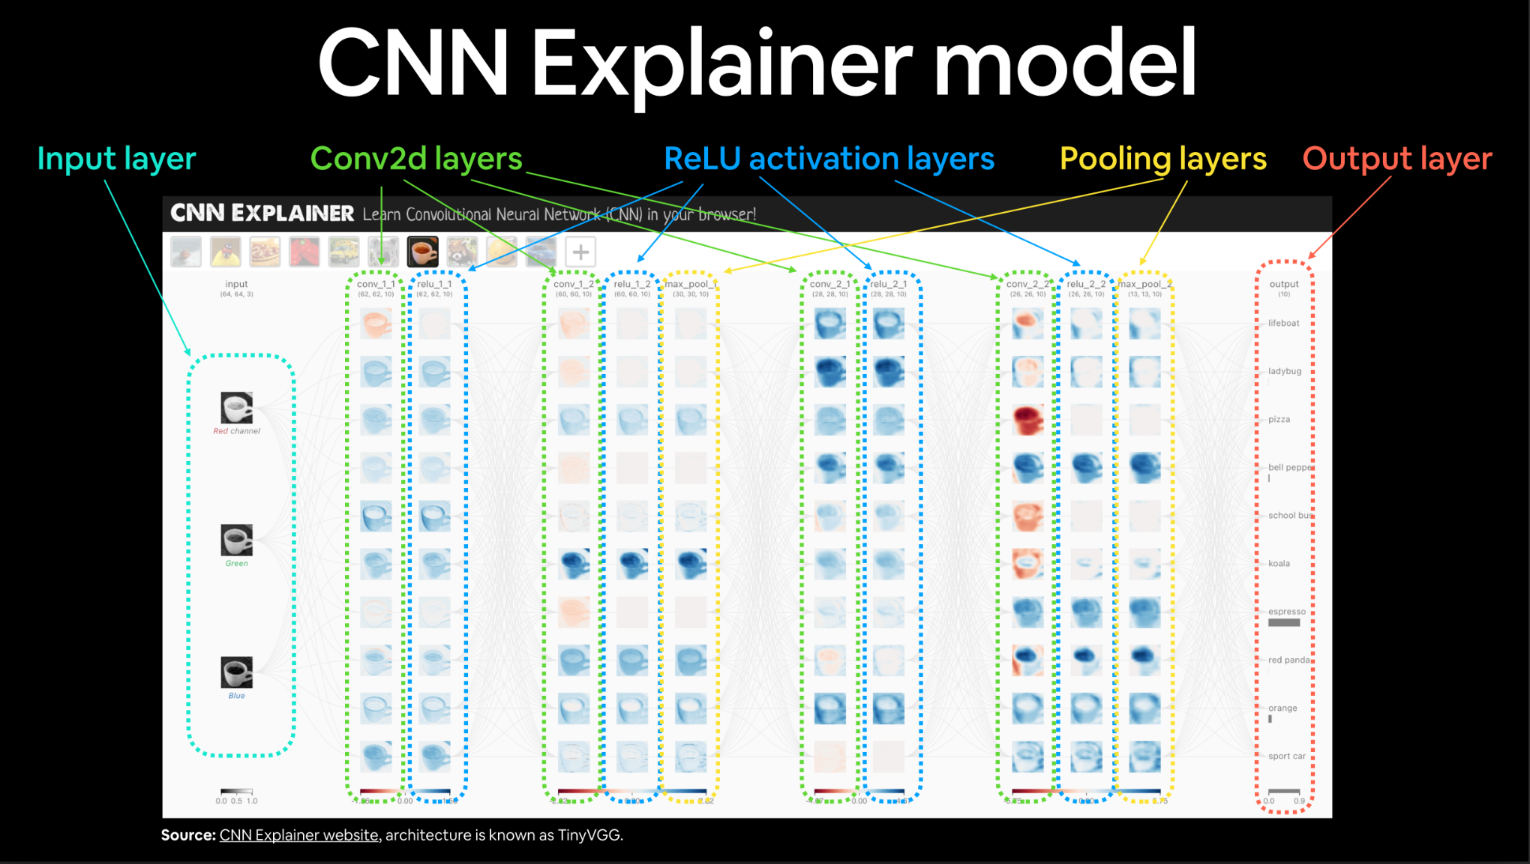

#### **7.3 Setup a loss function and optimizer for model_2**

In [230]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr= 0.1)


#### **7.4 training and testing model_2**

In [231]:
train_dataloader

In [232]:
model_2

FashionMNISTMODELV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [233]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):
  train_loss,train_acc= 0,0
  # print("1 done")
  for batch, (X,y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    # print("2 done")
    #1- forawar pass
    y_pred = model(X)
    # print("3 done")
    # print(f"y_pred shape: {y_pred.shape}, y shape: {y.shape}")
    #2- calculate loss
    loss = loss_fn(y_pred, y)
    # print("4 done")
    train_loss+=loss
    # print("5 done")

    train_acc+=accuracy_fn(y_true=y,
                           y_pred=y_pred.argmax(dim=1))
    # print("6 done")

    #3- optimizer zero grad
    optimizer.zero_grad()

    #4- loss backward
    loss.backward()

    # optimizer step
    optimizer.step()

  # calculate loss and acc
  train_loss/= len(data_loader)
  train_acc/= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")



def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device=device):
  test_loss, test_acc = 0, 0
  model.eval() # pur model in eval mode
  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device), y.to(device)
      test_pred = model(X)
      test_loss+= loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)
                              )
        # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")



In [234]:
for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch {batch}: X shape {X.shape}, y shape {y.shape}")
    X, y = X.to(device), y.to(device)
    ...


Batch 0: X shape torch.Size([32, 1, 28, 28]), y shape torch.Size([32])
Batch 1: X shape torch.Size([32, 1, 28, 28]), y shape torch.Size([32])
Batch 2: X shape torch.Size([32, 1, 28, 28]), y shape torch.Size([32])
Batch 3: X shape torch.Size([32, 1, 28, 28]), y shape torch.Size([32])
Batch 4: X shape torch.Size([32, 1, 28, 28]), y shape torch.Size([32])
Batch 5: X shape torch.Size([32, 1, 28, 28]), y shape torch.Size([32])
Batch 6: X shape torch.Size([32, 1, 28, 28]), y shape torch.Size([32])
Batch 7: X shape torch.Size([32, 1, 28, 28]), y shape torch.Size([32])
Batch 8: X shape torch.Size([32, 1, 28, 28]), y shape torch.Size([32])
Batch 9: X shape torch.Size([32, 1, 28, 28]), y shape torch.Size([32])
Batch 10: X shape torch.Size([32, 1, 28, 28]), y shape torch.Size([32])
Batch 11: X shape torch.Size([32, 1, 28, 28]), y shape torch.Size([32])
Batch 12: X shape torch.Size([32, 1, 28, 28]), y shape torch.Size([32])
Batch 13: X shape torch.Size([32, 1, 28, 28]), y shape torch.Size([32])
Ba

In [235]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs= 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device)

  test_step(data_loader=test_dataloader,
      model=model_2,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device=device
  )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59518 | Train accuracy: 78.38%
Test loss: 0.39500 | Test accuracy: 85.99%

Epoch: 1
---------
Train loss: 0.36536 | Train accuracy: 86.90%
Test loss: 0.35244 | Test accuracy: 86.91%

Epoch: 2
---------
Train loss: 0.32588 | Train accuracy: 88.13%
Test loss: 0.32719 | Test accuracy: 88.07%

Train time on cpu: 209.699 seconds


In [236]:
model_2_results = eval_model(
    model=model_2,
    data_loader= test_dataloader,
    loss_fn= loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTMODELV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

### **8. Compare model results**

We've trained three different models.

1. `model_0` - our baseline model with two `nn.Linear()` layers.
2. `model_1` - the same setup as our baseline model except with `nn.ReLU()` layers in between the `nn.Linear()` layers.
3. `model_2` - our first CNN model that mimics the TinyVGG architecture on the CNN Explainer website.

In [237]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTMODELV0,0.476639,83.426518,47.667337
1,FashionMNISTMODELV1,0.685001,75.019968,41.482970
2,FashionMNISTMODELV2,0.327190,88.069089,209.698611


The tradeoffs here are known as the **performance-speed** tradeoff.
> **Note:** The training times you get will be very dependant on the hardware you use.
>
> Generally, the more CPU cores you have, the faster your models will train on CPU. And similar for GPUs.
>
> Newer hardware (in terms of age) will also often train models faster due to incorporating technology advances.

How about we get visual?

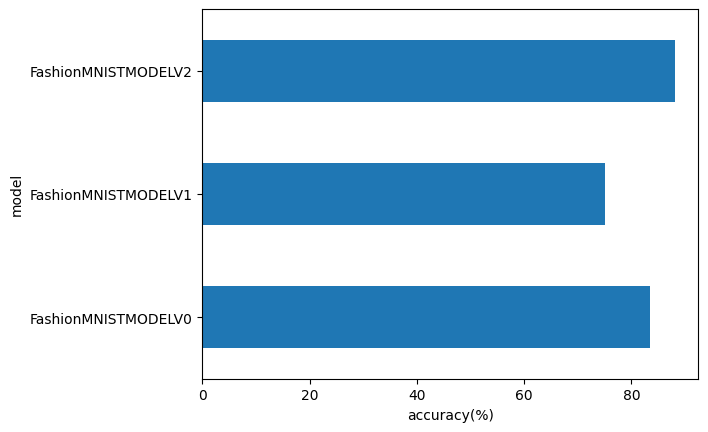

In [238]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
"""
This method changes the index of the DataFrame to be the values
in the column named "model_name"
"""
plt.xlabel("accuracy(%)")
plt.ylabel("model");

### **9. Make predictions**

Alright, we've compared our models to each other, let's further evaluate our best performing model, `model_2`.

To do so, let's create a function `make_predictions()` where we can pass the model and some data for it to predict on.

In [239]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device:torch.device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)
      # forward pass
      pred_logit = model(sample)
      # get prob
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      # get pred_prob off GPU
      pred_probs.append(pred_prob.cpu())
  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [240]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample , label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)
print(f"Test sample image shape:{test_samples[0].shape}")
print(f"{test_labels[0]}")
print(classes_names)
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]}({classes_names[test_labels[0]]})")


Test sample image shape:torch.Size([1, 28, 28])
5
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5(Sandal)


In [241]:
pred_probs = make_predictions(model=model_2,
                              data=test_samples,
                              device=device)
pred_probs[:2]

tensor([[1.4021e-06, 1.7343e-07, 4.4511e-07, 1.2103e-05, 5.4026e-07, 9.9938e-01,
         3.7154e-06, 2.1650e-04, 1.4199e-04, 2.4416e-04],
        [1.0080e-01, 5.6287e-01, 7.4506e-04, 1.1212e-01, 6.3881e-02, 3.0674e-04,
         1.5560e-01, 1.6463e-03, 1.0169e-03, 1.0133e-03]])

And now we can go from prediction probabilities to prediction labels by taking the `torch.argmax()` of the output of the `torch.softmax()` activation function.

In [242]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [243]:
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

"Visualize, visualize, visualize!"

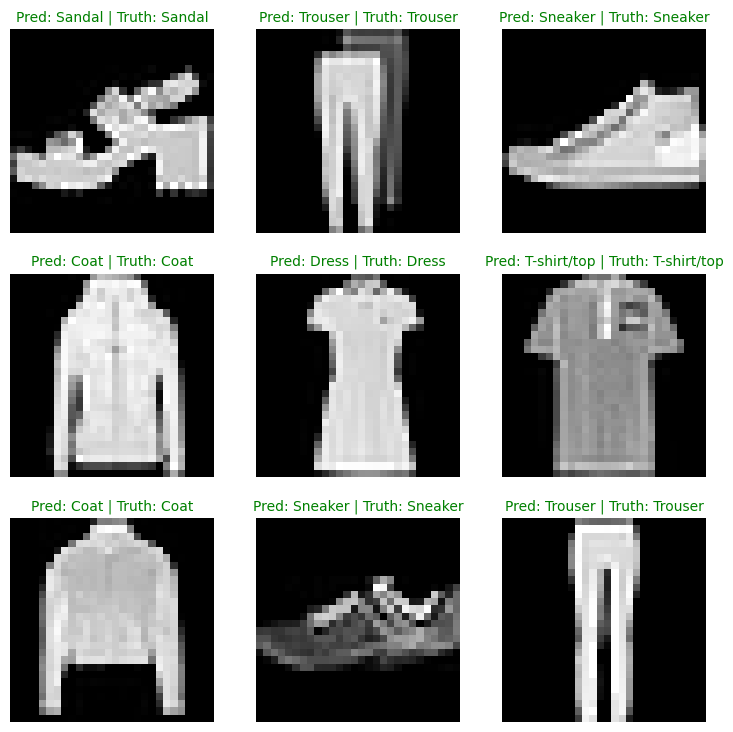

In [244]:
# plot_predictions
plt.figure(figsize=(9,9))
nrows, ncols= 3, 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)#row, col, index
  plt.imshow(sample.squeeze(), cmap="gray")
  pred_label = classes_names[pred_classes[i]]
  truth_label = classes_names[test_labels[i]]
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")
  plt.axis(False);


### **10. Making a confusion matrix for further prediction evaluation**

There are many [different evaluation metrics](https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics) we can use for classification problems.

One of the most visual is a [confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/).

A confusion matrix shows you where your classification model got confused between predicitons and true labels.

To make a confusion matrix, we'll go through three steps:
1. Make predictions with our trained model, `model_2` (a confusion matrix compares predictions to true labels).
2. Make a confusion matrix using [`torch.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/latest/references/modules.html?highlight=confusion#confusionmatrix).
3. Plot the confusion matrix using [`mlxtend.plotting.plot_confusion_matrix()`](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/).


In [245]:
from tqdm import tqdm

# make predictions with trained model
y_preds=[]
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc="Making predictions"):
    X,y = X.to(device), y.to(device)
    y_logit = model_2(X)
    y_pred= torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())
y_pred_tensor=torch.cat(y_preds)
y_pred_tensor

Making predictions: 100%|██████████| 313/313 [00:06<00:00, 46.63it/s]


tensor([9, 2, 1,  ..., 8, 1, 8])

Now we've got predictions, let's go through steps 2 & 3:
2. Make a confusion matrix using [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/latest/references/modules.html?highlight=confusion#confusionmatrix).
3. Plot the confusion matrix using [`mlxtend.plotting.plot_confusion_matrix()`](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/).

First we'll need to make sure we've got `torchmetrics` and `mlxtend` installed (these two libraries will help us make and visual a confusion matrix).

> **Note:** If you're using Google Colab, the default version of `mlxtend` installed is 0.14.0 (as of March 2022), however, for the parameters of the `plot_confusion_matrix()` function we'd like use, we need 0.19.0 or higher.

In [246]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1



First we'll create a `torchmetrics.ConfusionMatrix` instance telling it how many classes we're dealing with by setting `num_classes=len(class_names)`.

Then we'll create a confusion matrix (in tensor format) by passing our instance our model's predictions (`preds=y_pred_tensor`) and targets (`target=test_data.targets`).

Finally we can plot our confision matrix using the `plot_confusion_matrix()` function from `mlxtend.plotting`.

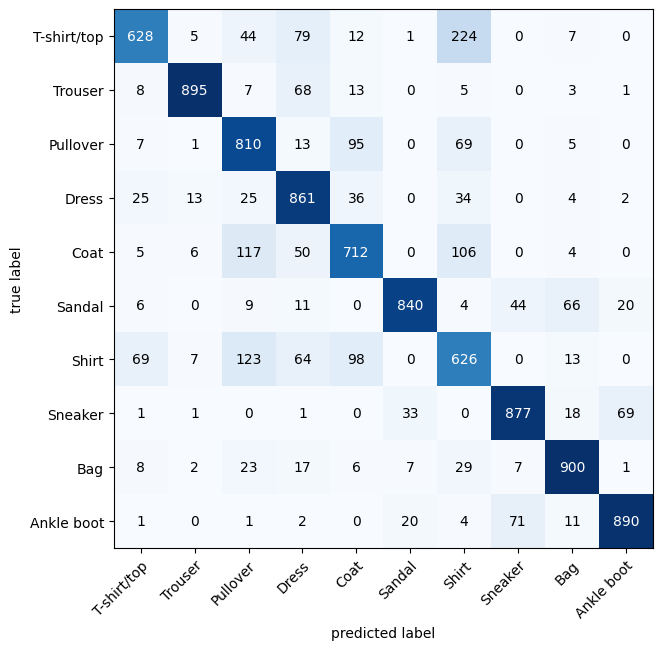

In [247]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(classes_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)
# plotting
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # cause matplot prefer wowrking with numpy
    class_names=classes_names,
    figsize=(10,7)
);

### **11. Save and load best performing model**
we can save and load a PyTorch model using a combination of:
* `torch.save` - a function to save a whole PyTorch model or a model's `state_dict()`.
* `torch.load` - a function to load in a saved PyTorch object.
* `torch.nn.Module.load_state_dict()` - a function to load a saved `state_dict()` into an existing model instance.

You can see more of these three in the [PyTorch saving and loading models documentation](https://pytorch.org/tutorials/beginner/saving_loading_models.html).

For now, let's save our `model_2`'s `state_dict()` then load it back in and evaluate it to make sure the save and load went correctly.

In [248]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [250]:
loadded_model_2 = FashionMNISTMODELV2(input_shape=1,
                                      hidden_units=10,
                                      output_shape=10)
loadded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# send model to device
laodded_model_2 = loadded_model_2.to(device)


<ipython-input-250-7d0fc35c78e0>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loadded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


In [251]:
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loadded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTMODELV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

We can find out if two tensors are close to each other using `torch.isclose()` and passing in a tolerance level of closeness via the parameters `atol` (absolute tolerance) and `rtol` (relative tolerance).

If our model's results are close, the output of `torch.isclose()` should be true.

In [253]:
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08,
              rtol=0.0001)


tensor(True)

## Exercises

All of the exercises are focused on practicing the code in the sections above.

You should be able to complete them by referencing each section or by following the resource(s) linked.

All exercises should be completed using [device-agnostic code](https://pytorch.org/docs/stable/notes/cuda.html#device-agnostic-code).

**Resources:**
* [Exercise template notebook for 03](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb)
* [Example solutions notebook for 03](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/03_pytorch_computer_vision_exercise_solutions.ipynb) (try the exercises *before* looking at this)

1. What are 3 areas in industry where computer vision is currently being used?
2. Search "what is overfitting in machine learning" and write down a sentence about what you find.
3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.
4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).
    * Upload your own example image using the "upload" button and see what happens in each layer of a CNN as your image passes through it.
5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.
6. Visualize at least 5 different samples of the MNIST training dataset.
7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.
8. Recreate `model_2` used in this notebook (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.
9. Train the model you built in exercise 8. on CPU and GPU and see how long it takes on each.
10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.
11. Plot a confusion matrix comparing your model's predictions to the truth labels.
12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?
13. Use a model similar to the trained `model_2` from this notebook to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
    * Then plot some predictions where the model was wrong alongside what the label of the image should've been.
    * After visualing these predictions do you think it's more of a modelling error or a data error?
    * As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

## Extra-curriculum
* **Watch:** [MIT's Introduction to Deep Computer Vision](https://www.youtube.com/watch?v=iaSUYvmCekI&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=3) lecture. This will give you a great intuition behind convolutional neural networks.
* Spend 10-minutes clicking thorugh the different options of the [PyTorch vision library](https://pytorch.org/vision/stable/index.html), what different modules are available?
* Lookup "most common convolutional neural networks", what architectures do you find? Are any of them contained within the [`torchvision.models`](https://pytorch.org/vision/stable/models.html) library? What do you think you could do with these?
* For a large number of pretrained PyTorch computer vision models as well as many different extensions to PyTorch's computer vision functionalities check out the [PyTorch Image Models library `timm`](https://github.com/rwightman/pytorch-image-models/) (Torch Image Models) by Ross Wightman.